# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [176]:
# seven imports plus matplotlib
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [177]:
#calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [178]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [179]:
# The monthly amount for the member's household income
monthly_income = 12000 

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [180]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [181]:
#requests.get used with json() on btc_call to get btc_response
btc_call = btc_url 
btc_response = requests.get(btc_call).json()
#json.dumps used to review data in a readable format with indent and sort_keys parameters
print(json.dumps(btc_response, indent=2, sort_keys=True))



{
  "data": {
    "1": {
      "circulating_supply": 18944068,
      "id": 1,
      "last_updated": 1643548643,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 719310463012,
          "percent_change_1h": -0.326900848518749,
          "percent_change_24h": 0.315033933610035,
          "percent_change_7d": 7.89349620541629,
          "percentage_change_1h": -0.326900848518749,
          "percentage_change_24h": 0.315033933610035,
          "percentage_change_7d": 7.89349620541629,
          "price": 37957.0,
          "volume_24h": 13668796810
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 18944068,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1643548643
  }
}


In [7]:
#same process as above
eth_call = eth_url 
eth_response = requests.get(eth_call).json()
print(json.dumps(eth_response, indent=2, sort_keys=True))


{
  "data": {
    "1027": {
      "circulating_supply": 119349887,
      "id": 1027,
      "last_updated": 1643398152,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 293477222023,
          "percent_change_1h": -0.420462360148642,
          "percent_change_24h": 1.40867618276121,
          "percent_change_7d": -18.5615949811895,
          "percentage_change_1h": -0.420462360148642,
          "percentage_change_24h": 1.40867618276121,
          "percentage_change_7d": -18.5615949811895,
          "price": 2455.85,
          "volume_24h": 15333487808
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119349887,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1643398152
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [259]:
# Navigating btc_response object (going through 5 levels)
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]   

print(f"Current BTC price: ${btc_price}") 


Current BTC price: $37957.0


In [260]:
# Navigating eth_response object in similar fashion
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

print(f"Current ETH price: ${eth_price}") 



Current ETH price: $2455.85


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [268]:
# Computing current value of the BTC holdings 
btc_value = btc_coins*btc_price
print(f"Current BTC Holdings Value: ${round(btc_value, 2)}.")  


Current BTC Holdings Value: $45548.4.


In [269]:
# Computing current value of the ETH holdings 
eth_value = eth_coins * eth_price
print(f"Current ETH Holdings Value: ${round(eth_value, 2)}.") 



Current ETH Holdings Value: $13016.0.


In [270]:
# add the holdings and print
total_crypto_wallet = btc_value + eth_value
 
print(f"The total crypto wallet is valued at ${round(total_crypto_wallet, 2)}.")



The total crypto wallet is valued at $58564.4.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [16]:
# verifying keys and displaying type
alpaca_api_key = os.getenv("alpaca_api") 
alpaca_secret_key = os.getenv("alpaca_secret")

display(type(alpaca_api_key)) 
display(type(alpaca_secret_key))
# Creating the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2") 

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [26]:
# list and tickers created followed by dataframe creation 
shares_data = {
    "shares":[spy_shares, agg_shares]
} 
   
tickers = ["SPY", "AGG"] 
portfolio_df = pd.DataFrame(shares_data, index = tickers)
print(portfolio_df)
# timeframe set
timeframe = "1D" 
# analyzing timestamp for one day with .isoformat()
start_date = pd.Timestamp("2022-01-27", tz = "America/New_York").isoformat() 
end_date = pd.Timestamp("2022-01-27", tz = "America/New_York").isoformat() 

     shares
SPY     110
AGG     200


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [190]:
# Using get_barset and .df on alpaca variable to create dataframe
portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_prices_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-27 00:00:00-05:00  111.62  111.88  111.62  111.72  5836124  438.26   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-27 00:00:00-05:00  441.58  429.45  431.27  136251597

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [272]:
# getting close price as floats and printing
agg_close_price = float(portfolio_prices_df["AGG"]["close"]) 
print(f"${agg_close_price}")




$111.72


In [271]:
# getting spy close price as floats and printing
spy_close_price = float(portfolio_prices_df["SPY"]["close"]) 
print(f"${spy_close_price}")




$431.27


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [273]:
# Close price * AGG shares
# note we can also just do agg_close_price* agg_shares too
agg_value = agg_close_price * portfolio_df.loc["AGG"]["shares"]  
print(f"AGG Value: ${round(agg_value, 2)}") 



AGG Value: $22344.0


In [274]:
# close price * SPY shares
spy_value = spy_close_price * portfolio_df.loc["SPY"]["shares"]
print(f"SPY Value: ${round(spy_value, 2)}") 



SPY Value: $47439.7


In [275]:
# agg_value + spy_value
total_stocks_bonds = agg_value + spy_value
print(f"Total stock/bond portfolio: ${total_stocks_bonds}")



Total stock/bond portfolio: $69783.7


In [277]:
# finding total porfolio amount 
total_portfolio = total_stocks_bonds + total_crypto_wallet
print(f"Total Portfolio value: ${round(total_portfolio, 2)}")


Total Portfolio value: $128348.1


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [219]:
# financial assets data in a Python list
savings_data = {
    "Portfolio Wallets": [total_crypto_wallet, total_stocks_bonds]
} 

savings_data

    

{'Portfolio Wallets': [58564.405, 69783.7]}

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [220]:
# wallet_tickers made 
# dataframe created with savings_data and index parameters
wallet_tickers = ["Crypto Value ($USD)", "Stock/Bonds Value ($USD)"]
savings_df = pd.DataFrame(savings_data, index = wallet_tickers) 

round(savings_df,2) 



,Portfolio Wallets
Crypto Value ($USD),58564.4
Stock/Bonds Value ($USD),69783.7


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Portfolio Wallets'>

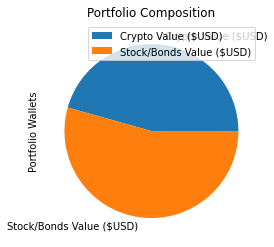

In [221]:
# y = 'Portfolio Wallets' is key input with plot.pie
savings_df.plot.pie(y = 'Portfolio Wallets', title = 'Portfolio Composition')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [54]:
# emergency fund created
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [53]:
# portfolio bigger than emergency fund
if total_portfolio > emergency_fund_value:
    print("Congrats! You have enough money in this fund.")
# portfolio equal in size
elif total_portfolio == emergency_fund_value:
    print("Congrats on reaching this financial goal! You're portfolio matches your emergency fund!")
# portfolio size less than emergency fund
else: 
    print(f"Your emergency fund goal can be reached with ${(emergency_fund_value - total_portfolio):0.2f} more dollars")

Congrats! You have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [222]:
# start and end dates of 3 years back from 2022-01-27
start_date_years = pd.Timestamp("2019-01-27", tz = "America/New_York").isoformat() 
end_date_years = pd.Timestamp("2022-01-27", tz = "America/New_York").isoformat() 
# max row amount
limit_rows = 1000


In [278]:
# Using Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
#parameters are tickers, timeframe, start, end, and limit
# we add .df to the end
prices_years_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date_years,
    end=end_date_years,
    limit=limit_rows
).df

# Reviewing the first five rows of the resulting DataFrame 
prices_years_df.head()

# Displaying both the first and last five rows of the DataFrame
display(prices_years_df.head())
display(prices_years_df.tail())

AGG                                        \
                             open     high      low     close    volume   
time                                                                      
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2019-01-28 00:00:00-05:00  263.39  263.82  261.79  263.6350  75207990  
2019-01-29 00:00:00-05:00  263.92  264.55  262.48  263.3100  54249161  
2019-01-30 00:00:00-05:00  265.10  268.52  264.25  267.4625  75091893  
2019-01-31 00:00:00-05:00  267.51  270.47  267.27  270.2325  73699733  
2019-02-01 00:00:00-05:00  270.15  271.20  269.18  270.0700  68194167

AGG                                       SPY  \
                               open    high     low   close    volume    open   
time                                                                            
2022-01-21 00:00:00-05:00  112.1900  112.35  112.11  112.24   7789076  445.56   
2022-01-24 00:00:00-05:00  112.3814  112.42  112.10  112.12  10666672  432.03   
2022-01-25 00:00:00-05:00  112.1800  112.30  111.96  112.00   9392367  433.06   
2022-01-26 00:00:00-05:00  112.0600  112.13  111.36  111.36  10170465  440.72   
2022-01-27 00:00:00-05:00  111.6200  111.88  111.62  111.72   5836124  438.26   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-21 00:00:00-05:00  448.06  437.97  438.11  174541931  
2022-01-24 00:00:00-05:00  440.38  420.76  439.88  233026938  
2022-01-25 00:00:00-05:00  439.72  364.68  434.51  148023735  
2022-01-26 00:00:00-05:00  444.04  428.86  433.45  174214548  
2022-01-27 00:00:00-05:00  441.58  429.45  431.27  136251597

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [240]:
# parameters of portfolio_data, weights, num_simulation, and num_trading_days aligned with prices_years_df
# 500 samples and 30 years of data to simulate
MC_years = MCSimulation(
  portfolio_data = prices_years_df,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)
# Reviewing the simulation input data

MC_years.portfolio_data.head()

AGG                                          \
                             open     high      low     close      volume   
time                                                                        
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589.0   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892.0   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983.0   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113.0   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [241]:
# cumulative returns for 30 year forecast
MC_years.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ferre\columbia\challenges\Module-Challenge-5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996799,0.996531,0.994801,0.992919,0.997448,0.978918,1.000332,1.000541,0.990526,1.003543,...,1.007807,0.994703,1.001510,0.988249,0.989920,0.995424,0.998665,0.996275,0.992635,0.990770
2,0.993223,0.996976,0.989335,0.994223,1.005262,0.979662,1.002162,0.996979,1.005295,1.005942,...,1.015803,1.000205,1.018490,0.984742,0.990349,0.986817,1.003704,0.987265,1.004169,0.970547
3,0.987168,1.000802,1.000812,1.009852,0.997585,0.984026,1.002486,1.004260,1.007274,1.006271,...,1.030753,1.000434,1.024999,0.985754,0.986391,0.988779,1.015447,0.979508,0.989783,0.966903
4,1.001204,1.008019,0.994889,1.008366,0.996074,0.992314,1.004266,0.999314,1.010807,1.007679,...,1.035306,1.000843,1.032330,0.983424,0.983702,0.991636,1.002445,0.970396,0.992106,0.954275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,77.353365,32.451392,50.724574,22.024735,21.640715,21.260021,26.184243,36.281579,22.011439,42.646863,...,64.133895,26.361353,62.537487,25.828031,35.337733,42.644058,30.923163,7.776820,124.743694,8.446650
7557,78.307501,32.575864,50.745488,22.281715,21.886994,20.739852,26.285732,36.217348,22.079647,43.565110,...,63.669074,26.100483,62.512478,26.027859,35.364373,43.193566,30.515000,7.826509,126.164151,8.406791
7558,77.417623,32.720722,50.938265,22.862007,21.708271,20.424923,26.212825,36.585407,21.926494,43.219822,...,63.195278,26.329432,62.318588,26.079504,35.512841,43.518466,30.640150,7.895998,123.945296,8.411005
7559,77.068470,32.597532,50.860495,22.641916,21.490755,20.528103,26.029071,36.784769,21.906536,43.041993,...,63.443617,26.318250,62.051268,26.160947,34.966271,42.841304,30.763450,7.970379,124.579909,8.442650


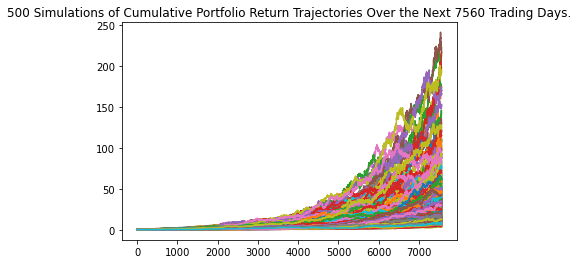

In [242]:
# line plot of 30 year simulation
simulation_plot = MC_years.plot_simulation() 

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

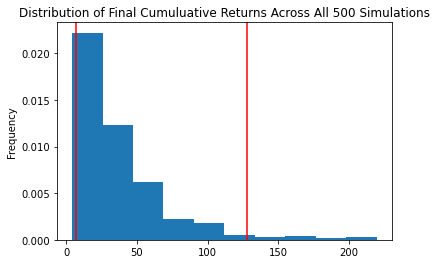

In [243]:
# histogram distribution plot of the 30 year simulation
distribution_plot = MC_years.plot_distribution() 

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [244]:
# summary statistics generated in a table
weight_table = MC_years.summarize_cumulative_return()

# Printing the table of summary statistics
print(weight_table) 

count           500.000000
mean             37.896873
std              33.273655
min               4.255613
25%              17.091741
50%              27.608778
75%              48.212584
max             219.474467
95% CI Lower      6.784501
95% CI Upper    127.772337
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [245]:
# current stocks/bonds portion
print(total_stocks_bonds) 

69783.7


In [246]:
# Using lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
# weight_table positions get 95% CI Lower and 95% CI Upper
ci_lower_thirty_cumulative_return = round(weight_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(weight_table[9]*total_stocks_bonds,2)

# Print statement displaying initial value, and projected cumulative returns within the CI
print(f"There is a 95% chance that an initial portfolio of ${total_stocks_bonds}"
      f" with 40% bond weight and 60% stock weight will, after 30 years, end in the range of"
      f" ${ci_lower_thirty_cumulative_return} to ${ci_upper_thirty_cumulative_return}.") 

There is a 95% chance that an initial portfolio of $69783.7 with 40% bond weight and 60% stock weight will, after 30 years, end in the range of $473447.6 to $8916426.43.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [252]:

# using 3-year data from before for 10 year forecast
prices_years_ten = prices_years_df
# Reviewing the first five rows of the resulting DataFrame 
prices_years_ten.head()
# 10-year forcast simulation with 20% bond and 80% stock weights
MC_ten = MCSimulation(
  portfolio_data = prices_years_ten,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)
# Reviewing the simulation input data
MC_ten.portfolio_data.head()


AGG                                        \
                             open     high      low     close    volume   
time                                                                      
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [253]:
# 10-yr cumulative return calculation 
MC_ten.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ferre\columbia\challenges\Module-Challenge-5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006486,1.019711,0.979546,0.989226,1.006747,0.997669,1.003660,0.989928,1.011372,0.982594,...,1.004665,1.006907,0.993595,1.005363,1.014786,0.995841,0.987935,0.997667,0.999475,0.998580
2,1.002845,1.024096,0.973334,0.977501,0.995447,0.997499,0.991039,0.997619,1.028887,0.977685,...,1.005293,1.005073,0.974348,1.023090,1.013460,1.004600,0.987443,1.009692,1.007799,1.014716
3,0.995284,1.021963,0.972497,0.968015,0.997478,1.000609,0.984149,0.993845,1.020118,0.980620,...,1.007321,1.014422,0.978747,1.021626,1.016319,1.005933,0.969633,1.004643,0.997845,1.015767
4,1.016606,1.032491,0.976605,0.961407,1.001352,0.997216,0.988116,0.990344,1.023496,0.973250,...,1.001622,1.002401,0.960397,1.026617,1.000728,1.022330,0.963383,1.011184,1.012308,1.010855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.063981,1.223739,1.768888,4.442539,2.161167,3.081638,3.691766,3.707363,2.901240,5.194530,...,3.463828,4.631806,8.118397,4.381445,7.052634,5.147421,2.316887,2.908447,6.518243,5.444510
2517,3.087887,1.229709,1.746996,4.344982,2.155194,3.068279,3.672090,3.680191,2.891401,5.229120,...,3.448988,4.664256,8.151525,4.403289,7.076537,5.221912,2.318442,2.880048,6.484205,5.467265
2518,3.059195,1.229703,1.746558,4.455617,2.160900,3.096047,3.718012,3.635075,2.947251,5.137977,...,3.508297,4.595179,8.158387,4.318260,7.155295,5.336140,2.379862,2.916925,6.624747,5.532201
2519,3.071594,1.231707,1.738717,4.447319,2.162418,3.122669,3.667744,3.641787,2.965408,5.034103,...,3.517309,4.639071,8.179301,4.388889,7.074257,5.313228,2.379392,3.006964,6.560617,5.635685


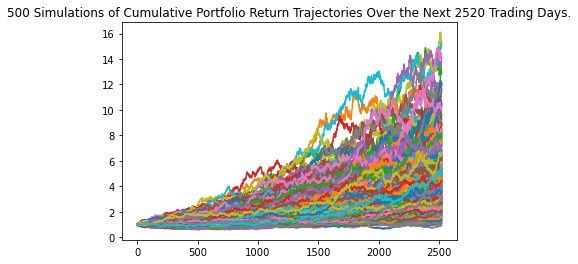

In [254]:
# 10-year forecast overlay line plot
ten_simulation = MC_ten.plot_simulation()

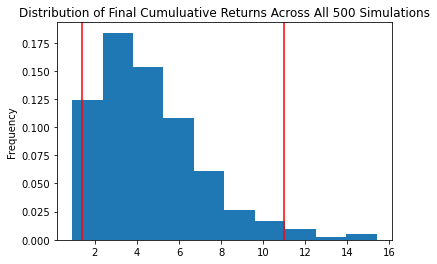

In [255]:
# 10-yer forecast distribution histogram chart 
ten_distribution = MC_ten.plot_distribution() 

In [256]:
# 10-yr forecast summary statistics generated and printed
ten_table = MC_ten.summarize_cumulative_return()
print(ten_table)


count           500.000000
mean              4.628400
std               2.540074
min               0.922109
25%               2.764796
50%               4.076459
75%               5.964307
max              15.387456
95% CI Lower      1.375179
95% CI Upper     10.974302
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [257]:
# current balance of the stock and bond portion of the members portfolio

print(total_stocks_bonds)

69783.7


In [258]:
# Using the lower and upper `95%` confidence intervals for 10-yr forecast
ci_lower_ten_cumulative_return = round(ten_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(ten_table[9]*total_stocks_bonds,2)

# detailed print statement for current balance and CI range projections
print(f"There is a 95% chance that an initial portfolio of ${total_stocks_bonds}"
      f" with 20% bond weight and 80% stock weight will, after 10 years, end in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.") 

There is a 95% chance that an initial portfolio of $69783.7 with 20% bond weight and 80% stock weight will, after 10 years, end in the range of $95965.11 and $765827.39.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?